In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Question 1: Use yfinance to Extract Stock Data


In [2]:
import yfinance as yf
import pandas as pd

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Replace with the actual URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table')

# Initialize lists to store data
dates = []
revenues = []

# Iterate through the table rows, skipping the header row
for row in table.find_all('tr')[1:]:
    # Find all table data cells in the row
    cols = row.find_all('td')
    if len(cols) == 2: 
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '') # Remove commas and $
        dates.append(date)
        revenues.append(revenue)

# Create the Pandas DataFrame
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Remove rows with empty strings or NaN in Revenue (important for cleaning)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Convert Revenue to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Display the last five rows of the tesla_revenue dataframe
print(tesla_revenue.tail())

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


## Question 3: Use yfinance to Extract Stock Data


In [12]:
import yfinance as yf
import pandas as pd

# Get Tesla stock data
gme = yf.Ticker("GME")
gme_data = tesla.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Use the `requests` library to download the webpage
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)

# Save the text of the response as a variable named `html_data_2`
html_data_2 = response_2.text

# Parse the html data using `beautiful_soup` using parser
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

gme_revenue_list = []
table = soup_2.find('table')
if table:
    for row in table.find_all('tr'):
        col = row.find_all('td')
        if len(col) == 2:
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace(',', '').replace('$', '')
            gme_revenue_list.append([date, revenue])

gme_revenue = pd.DataFrame(gme_revenue_list, columns=['Date', 'Revenue'])

print(gme_revenue.head())

   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [14]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\billi\AppData\Local\Temp\ipykernel_33880\3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\billi\AppData\Local\Temp\ipykernel_33880\3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



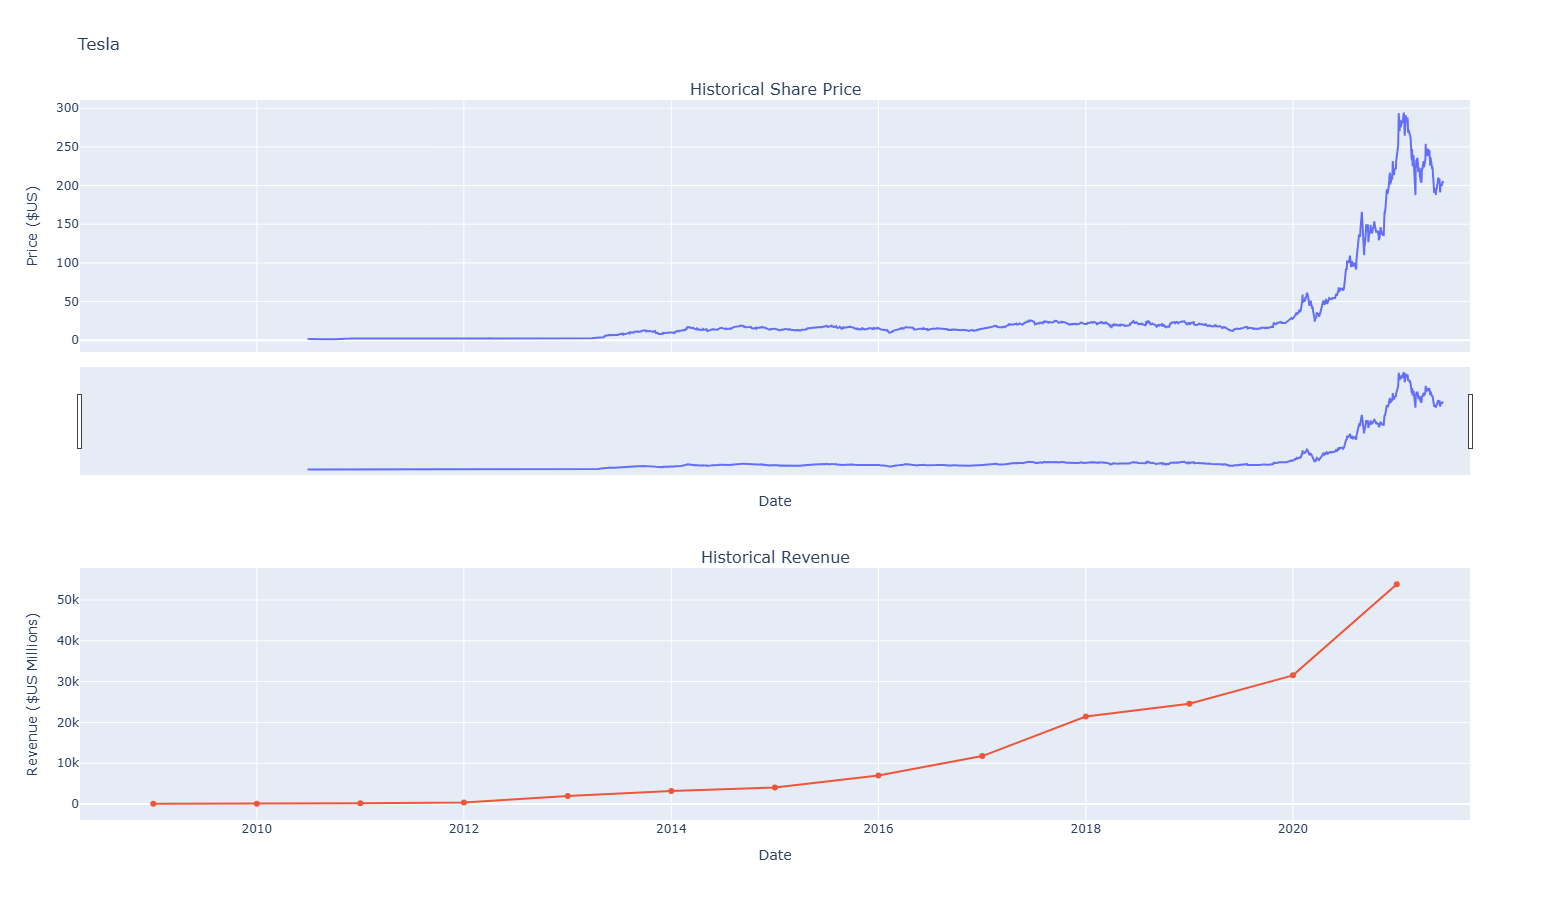

In [15]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


C:\Users\billi\AppData\Local\Temp\ipykernel_33880\3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\billi\AppData\Local\Temp\ipykernel_33880\3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



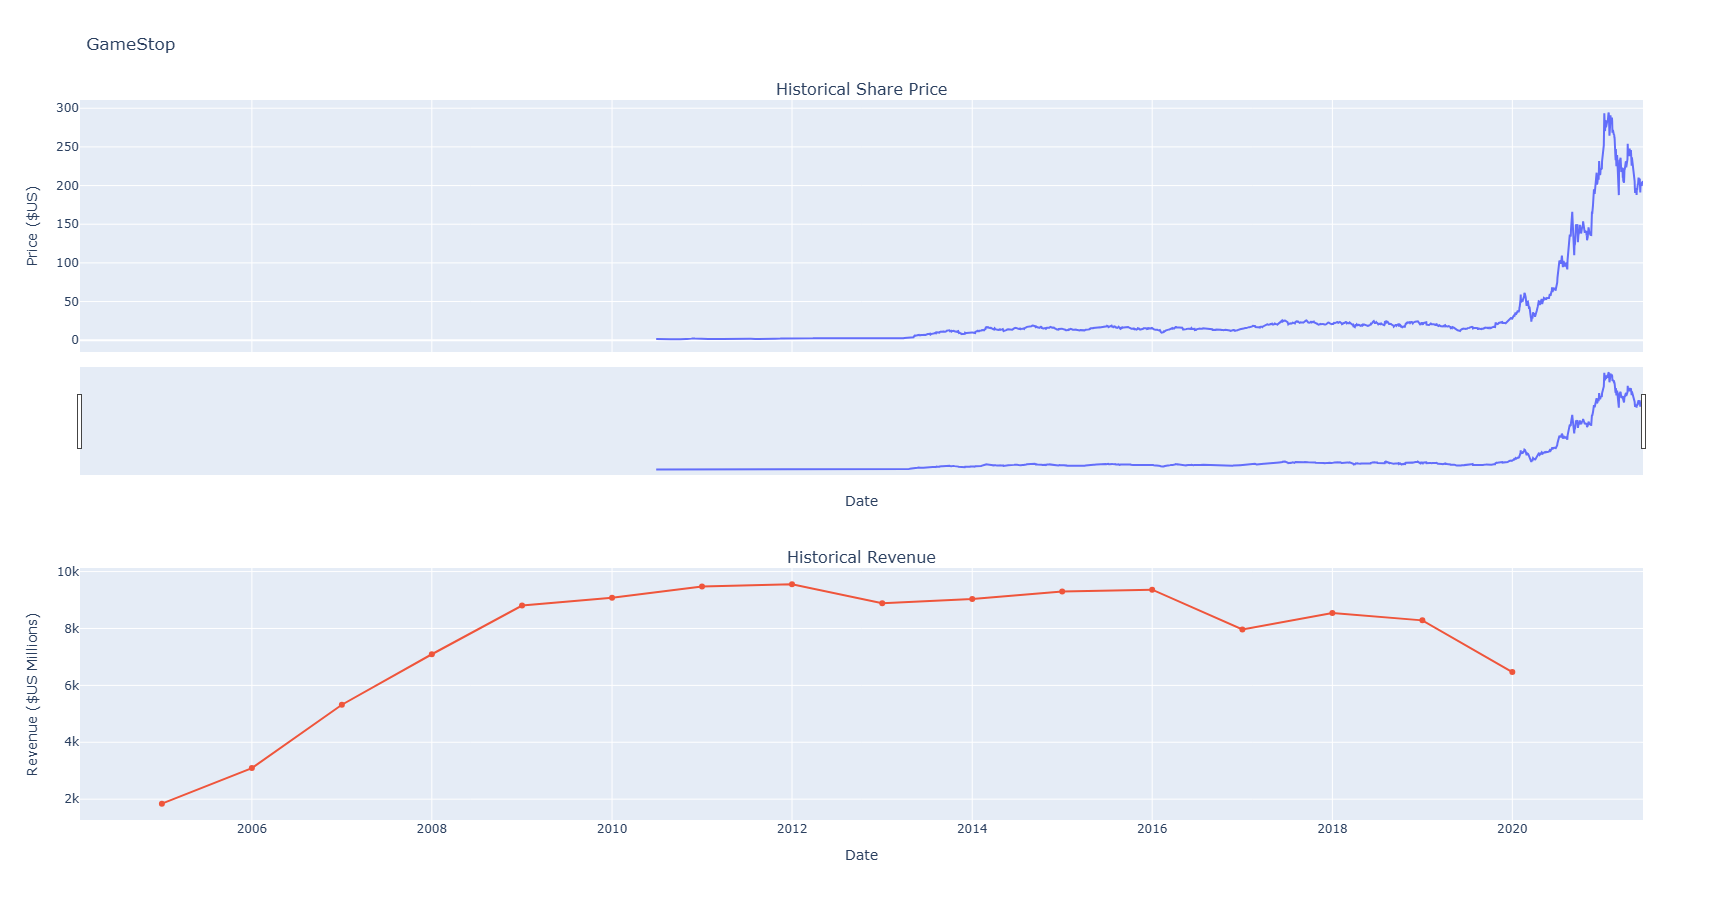

In [13]:
make_graph(gme_data, gme_revenue, 'GameStop')